## 1. Loading and Preprocessing 

In [1]:
# Import required libraries
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame and drop the species (target) column
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the first few rows
print(X.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [2]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 2. Clustering Algorithm Implementation 

### KMeans Clustering 

C:\Users\amrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


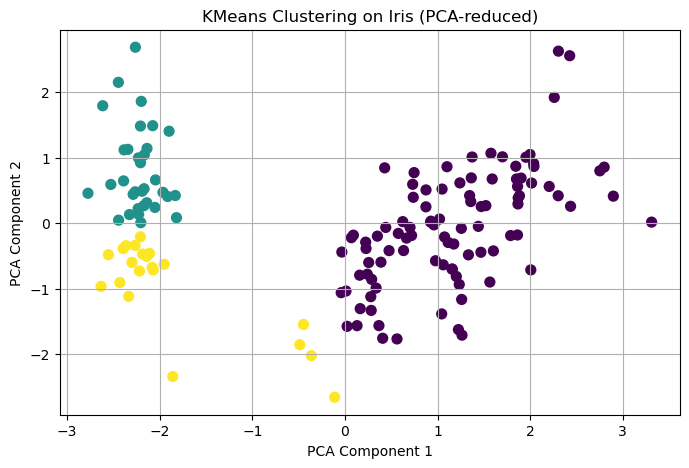

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("KMeans Clustering on Iris (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


###  Hierarchical Clustering 

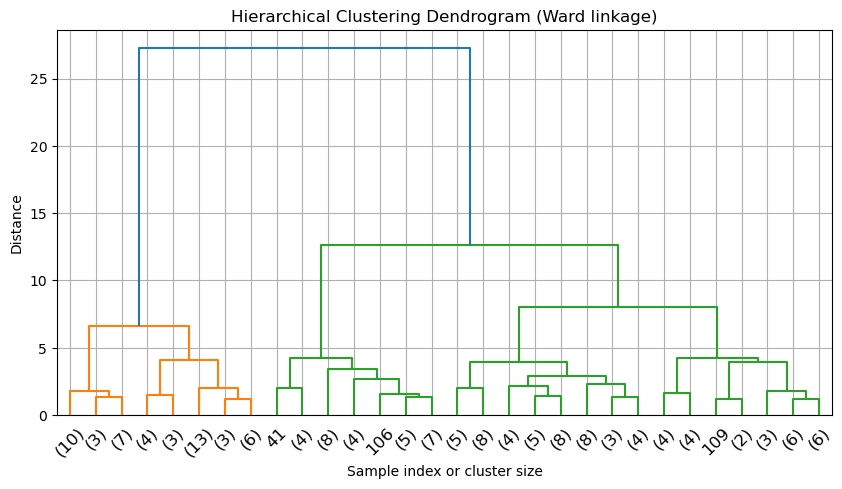

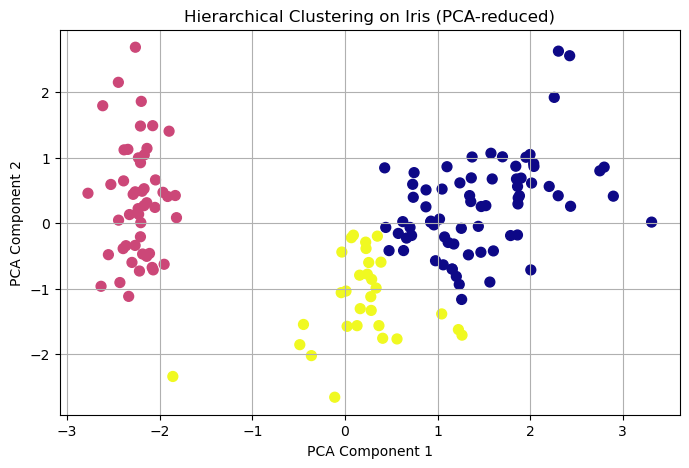

In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Compute linkage matrix using Ward's method
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=45., leaf_font_size=12.)
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sample index or cluster size")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

# Assign cluster labels (cutting the dendrogram at 3 clusters)
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='plasma', s=50)
plt.title("Hierarchical Clustering on Iris (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


C:\Users\amrut\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


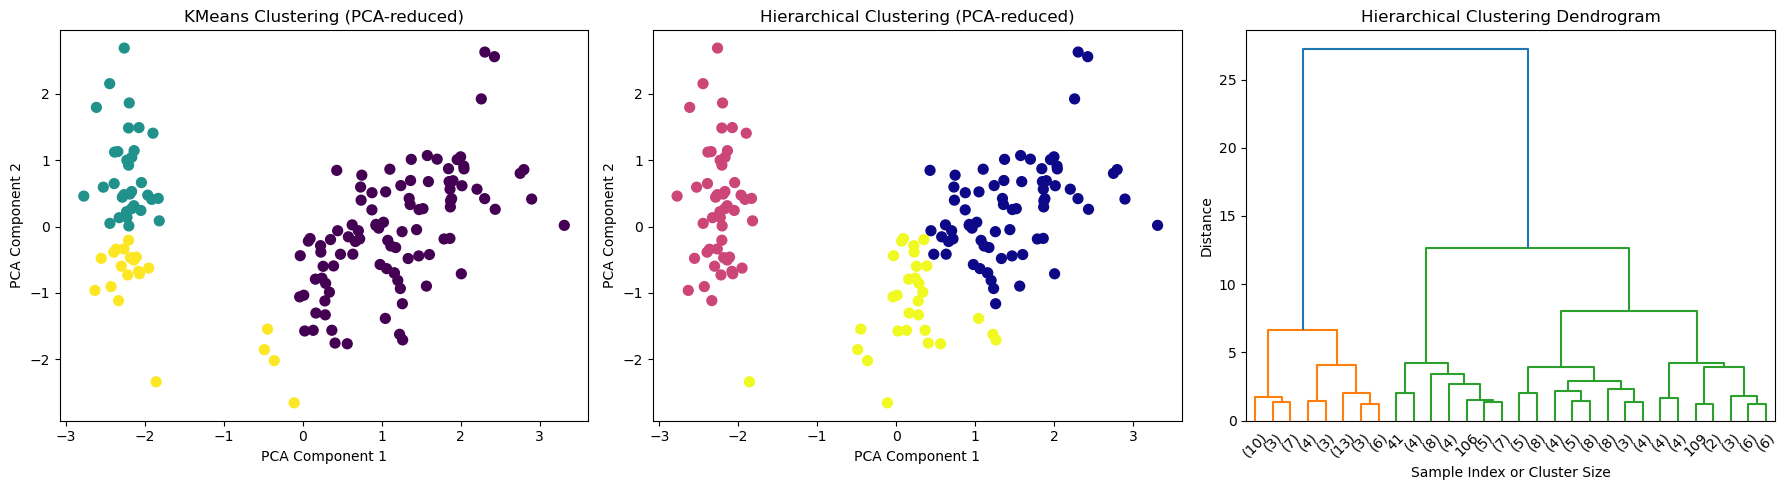

In [5]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# KMeans Plot
axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axs[0].set_title("KMeans Clustering (PCA-reduced)")
axs[0].set_xlabel("PCA Component 1")
axs[0].set_ylabel("PCA Component 2")

# Hierarchical Clustering Plot
axs[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='plasma', s=50)
axs[1].set_title("Hierarchical Clustering (PCA-reduced)")
axs[1].set_xlabel("PCA Component 1")
axs[1].set_ylabel("PCA Component 2")

# Dendrogram
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=45., leaf_font_size=10., ax=axs[2])
axs[2].set_title("Hierarchical Clustering Dendrogram")
axs[2].set_xlabel("Sample Index or Cluster Size")
axs[2].set_ylabel("Distance")

plt.tight_layout()
plt.show()